## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking for duplicate and null values

In [3]:
df.duplicated().sum()

0

Insight: No duplicate value is present in this dataset.

In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Insight: No null value is present in this dataset.

#### Removing Id column as it has no such functionality.

In [5]:
df.drop(columns='Id', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizations

Text(1.0, 1.0, 'Sepal Length vs Sepal Width')

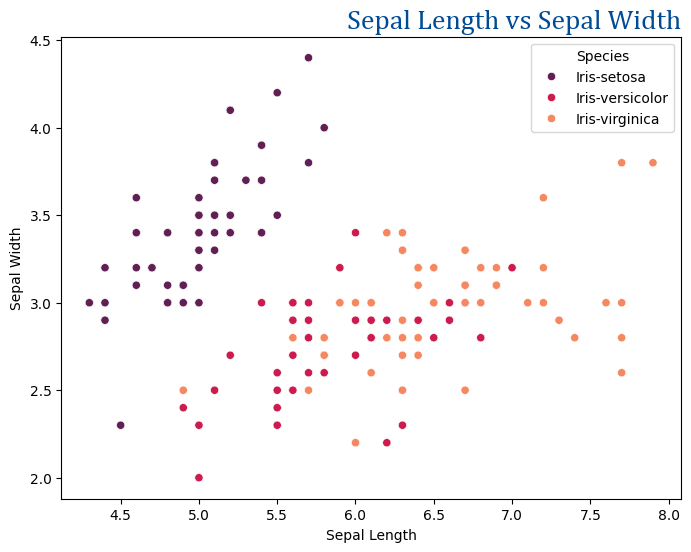

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='rocket')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width", color='#004B95', font='cambria', loc='right', fontsize= 20)

Insight: Specise versicolor and virginica has some mixed result based on sepal length and sepal width; but setosa has a completely different type of sepal length and width. So setosa species can be identified easily based on their sepal measurements.

Text(1.0, 1.0, 'Petal Length vs Petal Width')

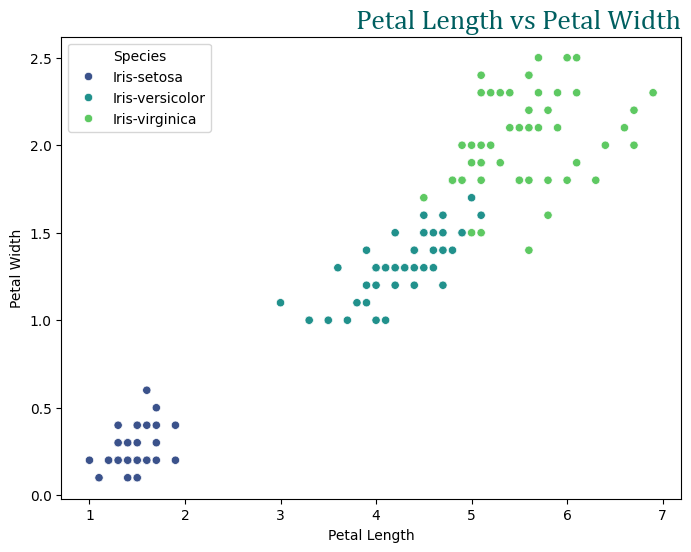

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width", color='#005F60', font='cambria', loc='right', fontsize=20)

Insight: All species have different petal length and petal width. So they can be identified easily.

## Model Building and Prediction

#### Seperating target variable 

In [30]:
x = df.drop(columns='Species', axis=1)
y = df['Species']

In [31]:
x.shape, y.shape

((150, 4), (150,))

#### Scaling the data and encoding the target data

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

x_sc = scaler.fit_transform(x.to_numpy())
x = pd.DataFrame(x_sc, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

y = encoder.fit_transform(y)

#### Splitting data into train and test data

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

#### Model Building

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [37]:
clf = RandomForestClassifier()
params = {
    'max_depth': [1, 2, 3, 5, 10, None],
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy']
}

model = GridSearchCV(clf, param_grid=params, cv = 5, verbose=3, scoring='accuracy')
model.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=50;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.905 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.810 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.857 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=50;, score=1.000 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.905 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.905 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.810 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=100;, score=1.000 total time=   0.4s
[CV 1/5] END criterion=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5, 10, None],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=3)

In [38]:
model.best_score_, model.best_params_

(0.9333333333333333,
 {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100})

#### Predicting and checking accuracy

In [39]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

